## Stochastic Average Gradient Algorithm

- to deal with the big 'N' problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [99]:
# dataset

dt = np.random.uniform(-200, 200, 50000)
tau_vals = [0.1, 0.3, 0.5, 0.9, 0.99]

In [109]:
def update_q(q, x, y, tau, N, alpha = 1):
#     print (alpha)
    pinball_loss = tau if x > q else (tau-1)
#     print (q, pinball_loss)
    q += ((N-1)*y + pinball_loss)*alpha/N
    y = pinball_loss
    return q, y

In [121]:
def update_q_lst(q_lst, tau_lst, y_lst, x, N):
#     print (y_lst)
    for i, q in enumerate(q_lst):
        tau = tau_lst[i]
        y = y_lst[i]
        alpha = tau if tau<= 0.5 else 1-tau
        q, y = update_q(q, x, y, tau, N, (1/(alpha)))
        q_lst[i] = q
        y_lst[i] = round(y, 5)
    return q_lst, y_lst

update_q_lst(np.array([-3, -0.4, 0.6, 5, 89]), tau_vals, [ 0.1 ,  0.3 , -0.5 , -0.1 , -0.01], 0.37, 30000)

(array([-2. ,  0.6, -0.4,  4. , 88. ]), [0.1, 0.3, -0.5, -0.1, -0.01])

In [122]:
def get_results(dt, tau_lst):
    N = dt.shape[0]
    q_procs = np.zeros((N, len(tau_lst)))
    q_lst = np.zeros(len(tau_lst))
    y_lst = np.zeros(len(tau_lst))
    for i, x in enumerate(dt):
        q_lst, y_lst = update_q_lst(q_lst, tau_lst, y_lst, x, N)
        q_procs[i]= q_lst
    return q_procs

In [123]:
proc = get_results(dt, tau_lst=tau_vals)

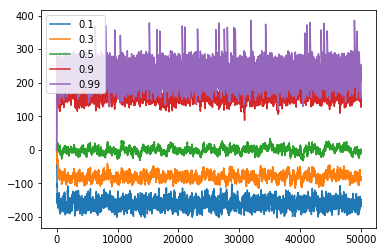

In [124]:
plt.plot(proc)
plt.legend(tau_vals)
plt.show()

In [120]:
proc[-1]

array([-160.68749875,  -80.47916542,   -0.81249875,  161.31249875,
        187.56249875])